In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy.stats import iqr

In [2]:
data = pd.read_csv('Train.csv')

In [3]:
data.columns

Index(['ID', 'account_type', 'gender', 'age', 'region_code', 'dc_cons_apr',
       'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'cc_cons'],
      dtype='object')

In [4]:
data.describe()

,ID,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,cc_cons
count,15000.000000,15000.000000,15000.000000,6387.000000,7153.000000,5334.000000,13915.000000,14470.000000,14256.000000,6387.000000,...,1.352200e+04,14115.000000,14115.000000,1.352200e+04,1.405200e+04,1.432900e+04,14343.000000,14342.000000,1.432900e+04,15000.000000
mean,10032.077067,35.821400,556.877333,10923.114017,23528.110831,9118.916767,9.063600,9.493020,19.186518,5.285110,...,5.693594e+05,4.118030,14.028339,3.241828e+05,1.003265e+06,9.867396e+05,5.861954,16.176823,3.260935e+05,12268.175133
std,5760.372343,8.375531,192.645289,11056.411334,16522.533692,9933.749457,8.451949,9.062888,12.310610,6.198838,...,3.807421e+05,4.011986,11.533652,2.226731e+05,6.187201e+05,6.083321e+05,4.857434,13.648530,2.016090e+05,11847.712240
min,1.000000,22.000000,129.000000,15.615941,21.929843,31.457671,1.000000,1.000000,1.000000,1.000000,...,9.306745e+01,0.000000,0.000000,2.650332e+01,6.810641e+01,3.941829e+01,0.000000,0.000000,2.550365e+01,0.000000
25%,5060.500000,30.000000,450.750000,4832.873529,11160.115609,3923.840414,3.000000,3.000000,10.000000,1.000000,...,2.848119e+05,2.000000,6.000000,1.592213e+05,4.986986e+05,4.943571e+05,3.000000,6.000000,1.607323e+05,5435.000000
50%,10054.000000,34.000000,566.000000,9704.319537,22829.797859,7930.919138,7.000000,7.000000,18.000000,3.000000,...,5.652102e+05,3.000000,11.000000,3.219137e+05,1.004250e+06,9.741022e+05,5.000000,13.000000,3.233262e+05,10810.000000
75%,15015.250000,39.000000,710.000000,14710.421644,34492.057737,12004.033689,12.000000,13.000000,27.000000,7.000000,...,8.489730e+05,5.000000,19.000000,4.821599e+05,1.493722e+06,1.476865e+06,7.000000,22.000000,4.861349e+05,16394.000000
max,19998.000000,223.000000,977.000000,361712.821531,343536.313152,292828.344121,100.000000,130.000000,137.000000,62.000000,...,2.137043e+07,71.000000,171.000000,1.276041e+07,2.737828e+07,2.589564e+07,94.000000,162.000000,3.147874e+06,237021.000000


In [5]:
data.pop('ID')

0        12554
1        17645
2         7604
3         1590
4        16556
         ...  
14995     6995
14996    10376
14997     2181
14998    18417
14999     4547
Name: ID, Length: 15000, dtype: int64

In [6]:
data.pop('investment_1')
data.pop('investment_2')
data.pop('investment_3')
data.pop('investment_4')
data.pop('loan_enq')

0        NaN
1        NaN
2          Y
3        NaN
4        NaN
        ... 
14995    NaN
14996    NaN
14997    NaN
14998    NaN
14999    NaN
Name: loan_enq, Length: 15000, dtype: object

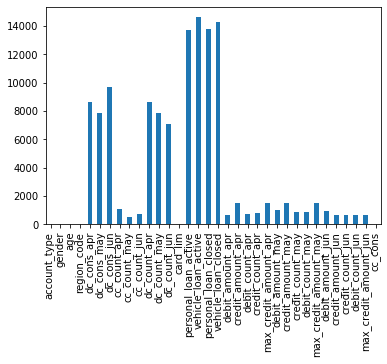

In [7]:
data.isnull().sum().plot(kind='bar')

In [8]:
data['personal_loan_closed']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
14995    NaN
14996    1.0
14997    1.0
14998    NaN
14999    NaN
Name: personal_loan_closed, Length: 15000, dtype: float64

In [9]:
data['personal_loan_closed'] = data['personal_loan_closed'].replace(np.nan,0)
data['personal_loan_active'] = data['personal_loan_active'].replace(np.nan,0)
data['vehicle_loan_closed'] = data['vehicle_loan_closed'].replace(np.nan,0)
data['vehicle_loan_active'] = data['vehicle_loan_active'].replace(np.nan,0)

In [10]:
data['dc_cons_apr'] = data['dc_cons_apr'].replace(np.nan,0)
data['dc_cons_may'] = data['dc_cons_may'].replace(np.nan,0)
data['dc_cons_jun'] = data['dc_cons_jun'].replace(np.nan,0)
data['dc_count_apr'] = data['dc_count_apr'].replace(np.nan,0)
data['dc_count_may'] = data['dc_count_may'].replace(np.nan,0)
data['dc_count_jun'] = data['dc_count_jun'].replace(np.nan,0)

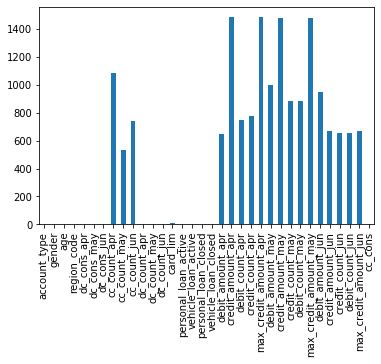

In [11]:
data.isnull().sum().plot(kind='bar')

In [12]:
data = data.fillna(data.mean())

In [13]:
data['personal_loan_active'] = data['personal_loan_active'].astype('int64')

In [14]:
data['personal_loan_closed'] = data['personal_loan_closed'].astype('int64')
data['vehicle_loan_active'] = data['vehicle_loan_active'].astype('int64')
data['vehicle_loan_closed'] = data['vehicle_loan_closed'].astype('int64')

In [15]:
data['cc_count_apr'] = data['cc_count_apr'].astype('int64')
data['cc_count_may'] = data['cc_count_may'].astype('int64')
data['cc_count_jun'] = data['cc_count_jun'].astype('int64')
data['dc_count_may'] = data['dc_count_may'].astype('int64')
data['dc_count_apr'] = data['dc_count_apr'].astype('int64')
data['dc_count_jun'] = data['dc_count_jun'].astype('int64')
data['debit_count_apr'] = data['debit_count_apr'].astype('int64')
data['debit_count_may'] = data['debit_count_may'].astype('int64')
data['debit_count_jun'] = data['debit_count_jun'].astype('int64')
data['credit_count_apr'] = data['credit_count_apr'].astype('int64')
data['credit_count_may'] = data['credit_count_may'].astype('int64')
data['credit_count_jun'] = data['credit_count_jun'].astype('int64')


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 34 columns):
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null float64
dc_cons_apr              15000 non-null float64
dc_cons_may              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null int64
cc_count_may             15000 non-null int64
cc_count_jun             15000 non-null int64
dc_count_apr             15000 non-null int64
dc_count_may             15000 non-null int64
dc_count_jun             15000 non-null int64
card_lim                 15000 non-null float64
personal_loan_active     15000 non-null int64
vehicle_loan_active      15000 non-null int64
personal_loan_closed     15000 non-null int64
vehicle_loan_closed      15000 non-null int64
debit_amount_apr         15000 non-null float64
cre

# adding new variable

In [17]:
data.columns

Index(['account_type', 'gender', 'age', 'region_code', 'dc_cons_apr',
       'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'cc_cons'],
      dtype='object')

In [18]:
# total dc cons for 3 months
data['dc_cons_sum'] = data['dc_cons_apr'] + data['dc_cons_may'] + data['dc_cons_jun']

In [19]:
# total dc and cc count for 3 months
data['cc_count_sum'] = data['cc_count_apr'] + data['cc_count_may'] + data['cc_count_jun']
data['dc_count_sum'] = data['dc_count_apr'] + data['dc_count_may'] + data['dc_count_jun']

In [20]:
#total dc cons average for 3 month
data['dc_cons_avg'] = data['dc_cons_sum']/data['dc_count_sum']

In [21]:
#Total dc cons average for each month
data['dc_cons_apr_avg'] = data['dc_cons_apr']/data['dc_count_apr']
data['dc_cons_may_avg'] = data['dc_cons_may']/data['dc_count_may']
data['dc_cons_jun_avg'] = data['dc_cons_jun']/data['dc_count_apr']

In [22]:
# Total dc and cc cons for 3 months
data['credit_amount_sum']= data['credit_amount_apr'] + data['credit_amount_may'] + data['credit_amount_jun']
data['debit_amount_sum']= data['debit_amount_apr'] + data['debit_amount_may'] + data['debit_amount_jun']

In [23]:
# Total dc and cc count for 3 months
data['credit_count_sum']= data['credit_count_apr'] + data['credit_count_may'] + data['credit_count_jun']
data['debit_count_sum']= data['debit_count_apr'] + data['debit_count_may'] + data['debit_count_jun']

In [24]:
# Total dc and cc cons average for 3 months
data['credit_amount_avg'] = data['credit_amount_sum']/data['credit_count_sum']
data['debit_amount_avg'] = data['debit_amount_sum']/data['debit_count_sum']

In [25]:
# Total cc cons average for each month
data['credit_amount_apr_avg'] = data['credit_amount_apr']/data['credit_count_apr']
data['credit_amount_may_avg'] = data['credit_amount_may']/data['credit_count_may']
data['credit_amount_jun_avg'] = data['credit_amount_jun']/data['credit_count_jun']

In [26]:
# Total dc cons average for each month
data['debit_amount_apr_avg'] = data['debit_amount_apr']/data['debit_count_apr']
data['debit_amount_may_avg'] = data['debit_amount_may']/data['debit_count_may']
data['debit_amount_jun_avg'] = data['debit_amount_jun']/data['debit_count_jun']

In [27]:
# perc credit amount for each month
data['perc_credit_amount_apr'] = data['credit_amount_apr']/data['max_credit_amount_apr']
data['perc_credit_amount_may'] = data['credit_amount_may']/data['max_credit_amount_may']
data['perc_credit_amount_jun'] = data['credit_amount_jun']/data['max_credit_amount_jun']

In [28]:
#dc_cons_month_prop
data['dc_cons_apr_prop'] = data['dc_cons_apr']/data['dc_cons_sum']
data['dc_cons_may_prop'] = data['dc_cons_may']/data['dc_cons_sum']
data['dc_cons_jun_prop'] = data['dc_cons_jun']/data['dc_cons_sum']

In [29]:
# credit_amount_month_prop
data['credit_amount_apr_prop'] = data['credit_amount_apr']/data['credit_amount_sum'] 
data['credit_amount_may_prop'] = data['credit_amount_may']/data['credit_amount_sum']
data['credit_amount_jun_prop'] = data['credit_amount_jun']/data['credit_amount_sum']

In [30]:
# debit_amount_month_prop
data['debit_amount_apr_prop'] = data['debit_amount_apr']/data['debit_amount_sum']
data['debit_amount_may_prop'] = data['debit_amount_may']/data['debit_amount_sum']
data['debit_amount_jun_prop'] = data['debit_amount_jun']/data['debit_amount_sum']

In [31]:
#dc by cc_amount_ratio_months
data['debit_by_credit_amount_ratio_apr'] = data['debit_amount_apr']/data['credit_amount_apr']
data['debit_by_credit_amount_ratio_may'] = data['debit_amount_may']/data['credit_amount_may']
data['debit_by_credit_amount_ratio_jun'] = data['debit_amount_jun']/data['credit_amount_jun']

In [32]:
data['account_type'] = data['account_type'].map({'saving' : 0, 'current' : 1})
data['gender'] = data['gender'].map({'M' : 0, 'F' : 1})

In [33]:
data.columns

Index(['account_type', 'gender', 'age', 'region_code', 'dc_cons_apr',
       'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'cc_cons', 'dc_cons_sum',
       'cc_count_sum', 'dc_count_sum', 'dc_cons_avg', 'dc_cons_apr_avg',
       'dc_cons_may_avg', 'dc_cons_jun_avg', 'credit_amount_sum',
       'debit_amount_sum', 'credit_count_sum', 'debit_count_sum',
       'credit_amount_avg', 'debit_amount_avg', 'credit_amount_apr_avg',
       'credit_a

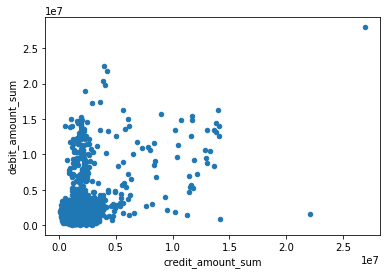

In [34]:
data.plot.scatter(x='credit_amount_sum', y='debit_amount_sum')

In [35]:
data.describe()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,dc_cons_jun_prop,credit_amount_apr_prop,credit_amount_may_prop,credit_amount_jun_prop,debit_amount_apr_prop,debit_amount_may_prop,debit_amount_jun_prop,debit_by_credit_amount_ratio_apr,debit_by_credit_amount_ratio_may,debit_by_credit_amount_ratio_jun
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,9413.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.786467,0.147067,35.821400,556.877333,4651.061948,11219.771785,3242.686802,9.059000,9.475600,19.177267,...,0.188472,0.197377,0.311359,0.491264,0.206349,0.302675,0.490976,5.806823,4.987320,7.168002
std,0.409815,0.354184,8.375531,192.645289,9012.245093,16379.201342,7358.137748,8.140528,8.901791,12.001471,...,0.270640,0.135622,0.173891,0.204044,0.150589,0.173983,0.206204,136.034357,77.968621,216.282614
min,0.000000,0.000000,22.000000,129.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000089,0.000096,0.000045,0.000030,0.000018,0.000145,0.000180,0.000189,0.000081
25%,1.000000,0.000000,30.000000,450.750000,0.000000,0.000000,0.000000,3.000000,3.000000,10.000000,...,0.000000,0.103569,0.190336,0.361858,0.102532,0.176504,0.360599,0.544474,0.538281,0.542524
50%,1.000000,0.000000,34.000000,566.000000,0.000000,0.000000,0.000000,7.000000,7.000000,19.000000,...,0.066116,0.182124,0.296295,0.513500,0.187046,0.285947,0.512417,1.074823,1.010709,1.016747
75%,1.000000,0.000000,39.000000,710.000000,7961.438852,21839.681968,4595.398707,12.000000,12.000000,26.000000,...,0.274173,0.255517,0.410960,0.632680,0.266216,0.401547,0.635299,1.921975,1.815741,1.971796
max,1.000000,1.000000,223.000000,977.000000,361712.821531,343536.313152,292828.344121,100.000000,130.000000,137.000000,...,1.000000,0.958185,0.968838,0.988057,0.991287,0.998519,0.991517,15335.628965,6830.906149,21477.839041


In [36]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

account_type                           0.000000
gender                                 0.000000
age                                    9.000000
region_code                          259.250000
dc_cons_apr                         7961.438852
                                       ...     
debit_amount_may_prop                  0.225043
debit_amount_jun_prop                  0.274700
debit_by_credit_amount_ratio_apr       1.377501
debit_by_credit_amount_ratio_may       1.277460
debit_by_credit_amount_ratio_jun       1.429272
Length: 68, dtype: float64


In [37]:
data[data==np.inf]=np.nan
data.fillna(data.mean(), inplace=True)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 68 columns):
account_type                        15000 non-null int64
gender                              15000 non-null int64
age                                 15000 non-null int64
region_code                         15000 non-null float64
dc_cons_apr                         15000 non-null float64
dc_cons_may                         15000 non-null float64
dc_cons_jun                         15000 non-null float64
cc_count_apr                        15000 non-null int64
cc_count_may                        15000 non-null int64
cc_count_jun                        15000 non-null int64
dc_count_apr                        15000 non-null int64
dc_count_may                        15000 non-null int64
dc_count_jun                        15000 non-null int64
card_lim                            15000 non-null float64
personal_loan_active                15000 non-null int64
vehicle_loan_active       

In [39]:
print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

       account_type  gender    age  region_code  dc_cons_apr  dc_cons_may  \
0              True   False  False        False        False        False   
1             False   False  False        False        False        False   
2             False   False  False        False        False        False   
3             False   False  False        False        False        False   
4             False   False  False        False        False        False   
...             ...     ...    ...          ...          ...          ...   
14995          True   False  False        False        False        False   
14996          True   False  False        False        False        False   
14997         False   False  False        False        False        False   
14998         False   False  False        False        False        False   
14999         False   False  False        False        False        False   

       dc_cons_jun  cc_count_apr  cc_count_may  cc_count_jun  ...  \
0     

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [40]:
data_df_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_df_out.shape

(845, 68)

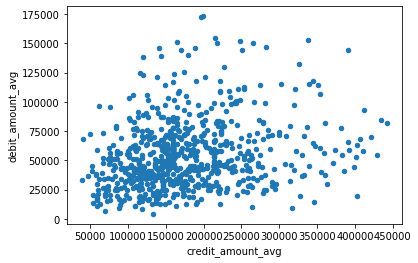

In [41]:
data_df_out.plot.scatter(x='credit_amount_avg', y='debit_amount_avg')

In [42]:
data.describe()

,account_type,gender,age,region_code,dc_cons_apr,dc_cons_may,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,dc_cons_jun_prop,credit_amount_apr_prop,credit_amount_may_prop,credit_amount_jun_prop,debit_amount_apr_prop,debit_amount_may_prop,debit_amount_jun_prop,debit_by_credit_amount_ratio_apr,debit_by_credit_amount_ratio_may,debit_by_credit_amount_ratio_jun
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.786467,0.147067,35.821400,556.877333,4651.061948,11219.771785,3242.686802,9.059000,9.475600,19.177267,...,0.188472,0.197377,0.311359,0.491264,0.206349,0.302675,0.490976,5.806823,4.987320,7.168002
std,0.409815,0.354184,8.375531,192.645289,9012.245093,16379.201342,7358.137748,8.140528,8.901791,12.001471,...,0.214388,0.135622,0.173891,0.204044,0.150589,0.173983,0.206204,136.034357,77.968621,216.282614
min,0.000000,0.000000,22.000000,129.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000089,0.000096,0.000045,0.000030,0.000018,0.000145,0.000180,0.000189,0.000081
25%,1.000000,0.000000,30.000000,450.750000,0.000000,0.000000,0.000000,3.000000,3.000000,10.000000,...,0.000000,0.103569,0.190336,0.361858,0.102532,0.176504,0.360599,0.544474,0.538281,0.542524
50%,1.000000,0.000000,34.000000,566.000000,0.000000,0.000000,0.000000,7.000000,7.000000,19.000000,...,0.188472,0.182124,0.296295,0.513500,0.187046,0.285947,0.512417,1.074823,1.010709,1.016747
75%,1.000000,0.000000,39.000000,710.000000,7961.438852,21839.681968,4595.398707,12.000000,12.000000,26.000000,...,0.188472,0.255517,0.410960,0.632680,0.266216,0.401547,0.635299,1.921975,1.815741,1.971796
max,1.000000,1.000000,223.000000,977.000000,361712.821531,343536.313152,292828.344121,100.000000,130.000000,137.000000,...,1.000000,0.958185,0.968838,0.988057,0.991287,0.998519,0.991517,15335.628965,6830.906149,21477.839041


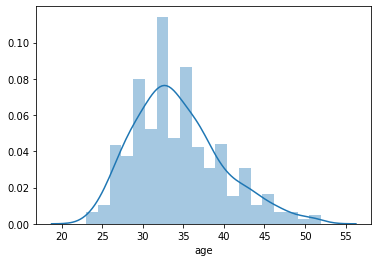

In [43]:
sns.distplot(data_df_out['age'])

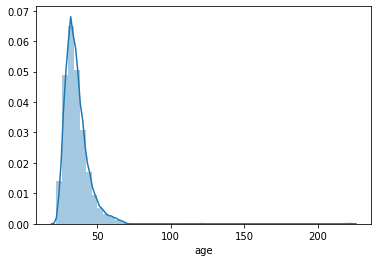

In [44]:
sns.distplot(data['age'])

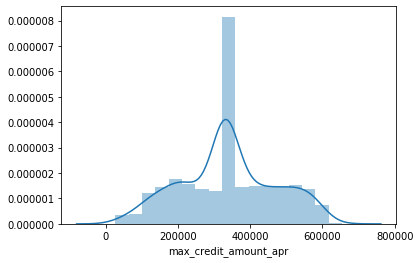

In [45]:
sns.distplot(data_df_out['max_credit_amount_apr'])

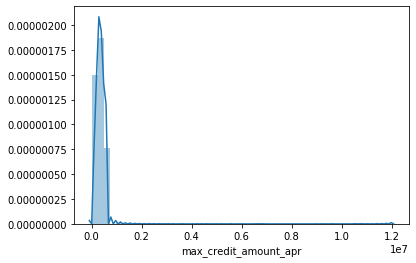

In [46]:
sns.distplot(data['max_credit_amount_apr'])

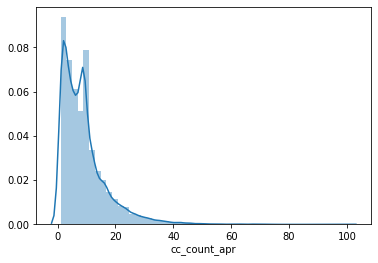

In [47]:
sns.distplot(data['cc_count_apr'])

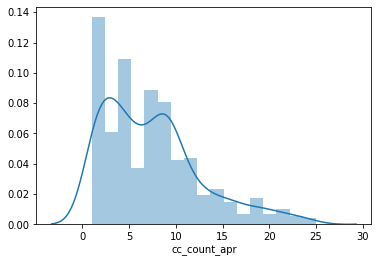

In [48]:
sns.distplot(data_df_out['cc_count_apr'])

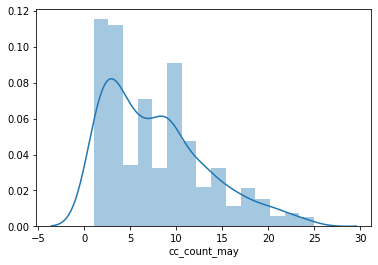

In [49]:
sns.distplot(data_df_out['cc_count_may'])

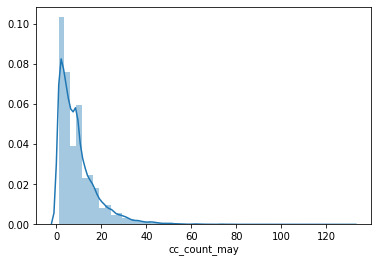

In [50]:
sns.distplot(data['cc_count_may'])

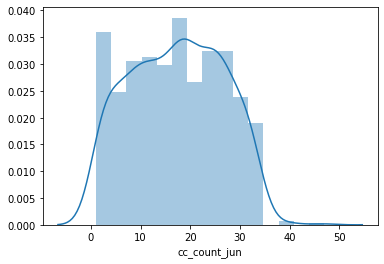

In [51]:
sns.distplot(data_df_out['cc_count_jun'])

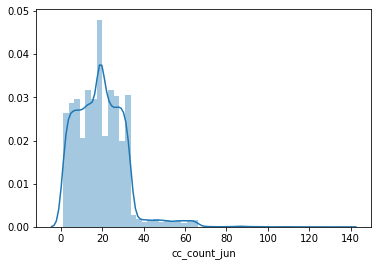

In [52]:
sns.distplot(data['cc_count_jun'])

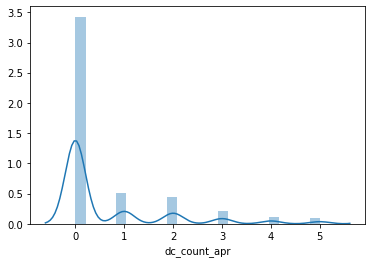

In [53]:
sns.distplot(data_df_out['dc_count_apr'])

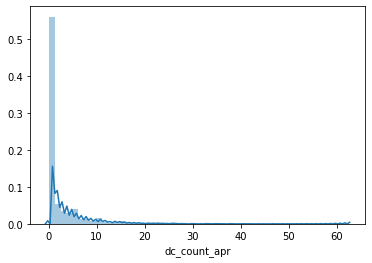

In [54]:
sns.distplot(data['dc_count_apr'])

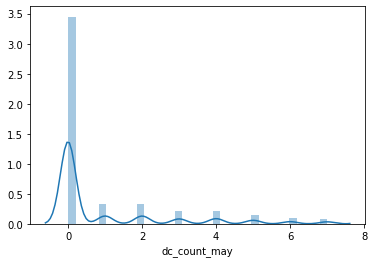

In [55]:
sns.distplot(data_df_out['dc_count_may'])

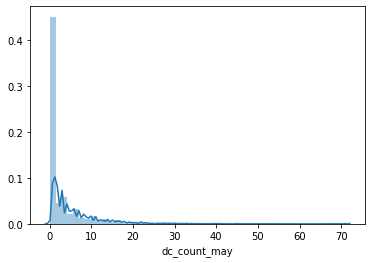

In [56]:
sns.distplot(data['dc_count_may'])

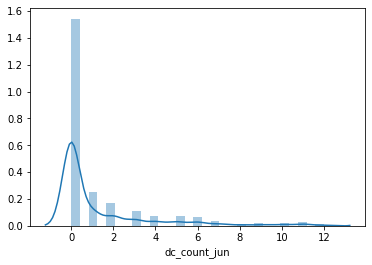

In [57]:
sns.distplot(data_df_out['dc_count_jun'])

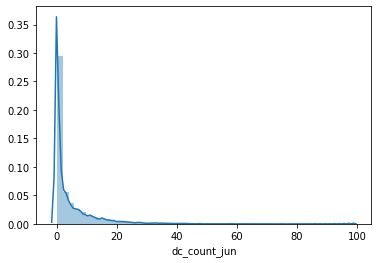

In [58]:
sns.distplot(data['dc_count_jun'])

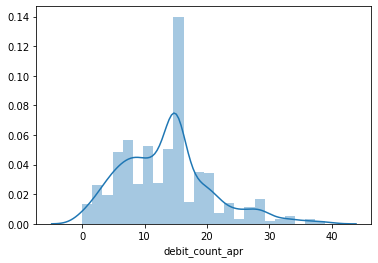

In [59]:
sns.distplot(data_df_out['debit_count_apr'])

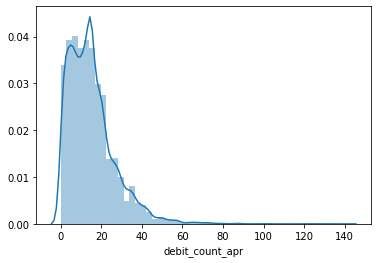

In [60]:
sns.distplot(data['debit_count_apr'])

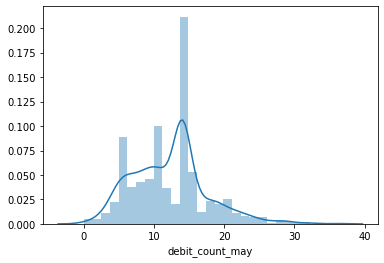

In [61]:
sns.distplot(data_df_out['debit_count_may'])

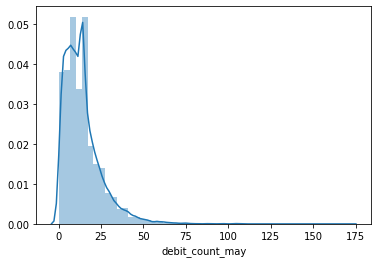

In [62]:
sns.distplot(data['debit_count_may'])

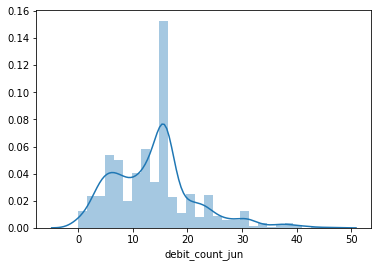

In [63]:
sns.distplot(data_df_out['debit_count_jun'])

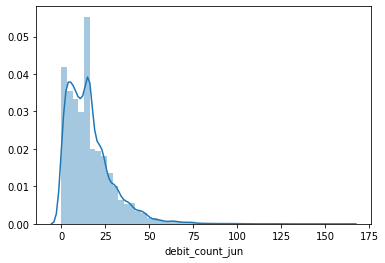

In [64]:
sns.distplot(data['debit_count_jun'])

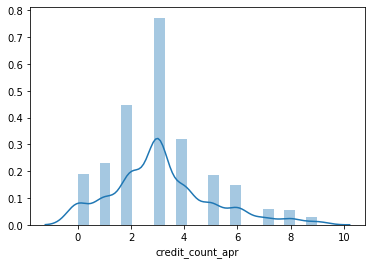

In [65]:
sns.distplot(data_df_out['credit_count_apr'])

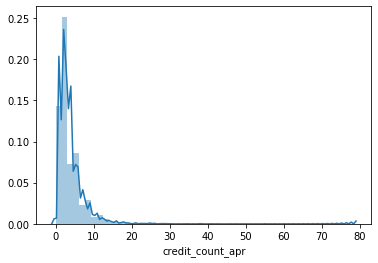

In [66]:
sns.distplot(data['credit_count_apr'])

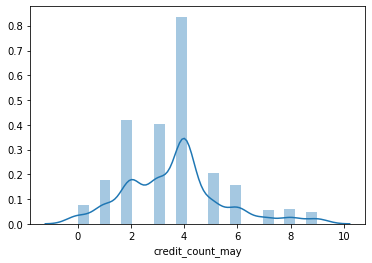

In [67]:
sns.distplot(data_df_out['credit_count_may'])

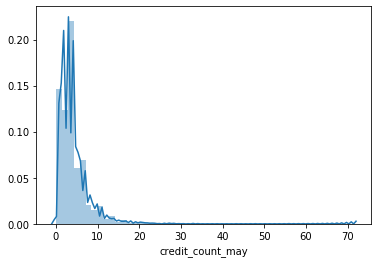

In [68]:
sns.distplot(data['credit_count_may'])

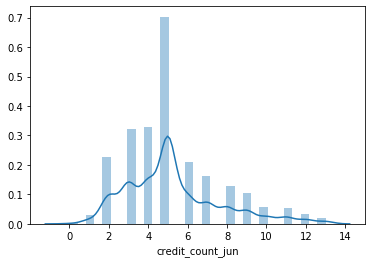

In [69]:
sns.distplot(data_df_out['credit_count_jun'])

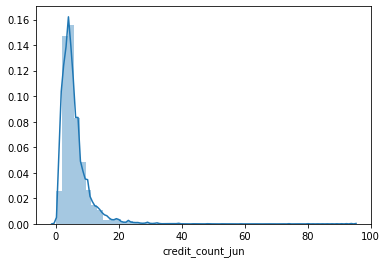

In [70]:
sns.distplot(data['credit_count_jun'])

# RandomForest

In [71]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import xgboost as xgb
import matplotlib.pyplot as plt

In [72]:
X, y = data_df_out.drop('cc_cons',axis = 1), data_df_out['cc_cons']

In [73]:
print(y)

9         5772.0
12        6961.0
19       13572.0
29       18015.0
79        4022.0
          ...   
14939     6247.0
14957     7571.0
14971    19761.0
14981    14938.0
14986    15363.0
Name: cc_cons, Length: 845, dtype: float64


In [74]:
y = np.log1p(y)

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                          random_state = 17)

In [77]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [78]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth':

In [79]:
best_grid = grid_search.best_estimator_

In [80]:
best_grid.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=12,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [81]:
preds = best_grid.predict(X_test)

In [82]:
preds = np.expm1(preds)

In [83]:
from sklearn import metrics

In [84]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,preds)))

Mean Absolute Error: 7686.90979690587
Mean Squared Error: 60058190.28104033
Root Mean Squared Error: 7749.721948627598


# Xgboost

In [85]:
xg_reg = xgb.XGBRegressor(objective= "reg:linear",
                          max_depth = 5,
                         n_estimators=10,
                        seed = 123)

In [86]:
xg_reg.fit(X_train, y_train)

[13:13:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\rkbis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             silent=None, subsample=1, verbosity=1)

In [87]:
preds_xg = xg_reg.predict(X_test)

In [88]:
preds_xg = np.expm1(preds_xg)

In [89]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_xg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,preds_xg)))

Mean Absolute Error: 399.11744163924993
Mean Squared Error: 160733.77660571167
Root Mean Squared Error: 400.91617154426643


# Lasso Regression

In [90]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [91]:
# instantiate lasso model
lasso = Lasso()

# fit and predict
lasso.fit(X_train, y_train)
preds_lasso = lasso.predict(X_test)
preds_lasso = np.expm1(preds_lasso)


In [92]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_lasso))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_lasso))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,preds_lasso)))

Mean Absolute Error: 7809.189781746265
Mean Squared Error: 62793675.607598975
Root Mean Squared Error: 7924.246059253775


# Linear Regression 

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [94]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
preds_lr= lr.predict(X_test)
preds_lr = np.expm1(preds_lr)

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds_lr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,preds_lr)))

Mean Absolute Error: 7937.991402623071
Mean Squared Error: 68232644.70812313
Root Mean Squared Error: 8260.305364096605


# Predicting Test Data

In [97]:
test = pd.read_csv('Test_new.csv')

In [98]:
test.columns

Index(['Unnamed: 0', 'ID', 'account_type', 'gender', 'age', 'region_code',
       'dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'dc_cons_sum', 'cc_count_sum', 'dc_count_sum', 'dc_cons_avg',
       'dc_cons_apr_avg', 'dc_cons_may_avg', 'dc_cons_jun_avg',
       'credit_amount_sum', 'debit_amount_sum', 'credit_count_sum',
       'debit_count_sum', 'credit_amount_avg', 'debit_amount_avg',
       'credit_amount_apr_avg', 

In [100]:
test.pop('Unnamed: 0')
test.pop('ID')

0       17591
1       13541
2       13431
3        8687
4       14727
        ...  
4995    12512
4996    14224
4997    18740
4998    18134
4999    12413
Name: ID, Length: 5000, dtype: int64

In [101]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 13558 to 117
Data columns (total 67 columns):
account_type                        254 non-null int64
gender                              254 non-null int64
age                                 254 non-null int64
region_code                         254 non-null float64
dc_cons_apr                         254 non-null float64
dc_cons_may                         254 non-null float64
dc_cons_jun                         254 non-null float64
cc_count_apr                        254 non-null int64
cc_count_may                        254 non-null int64
cc_count_jun                        254 non-null int64
dc_count_apr                        254 non-null int64
dc_count_may                        254 non-null int64
dc_count_jun                        254 non-null int64
card_lim                            254 non-null float64
personal_loan_active                254 non-null int64
vehicle_loan_active                 254 non-null int64
p

In [102]:
test.shape

(5000, 67)

In [103]:
# Lasso Prediction
preds_lasso_test = lasso.predict(test)

In [104]:
# Linear Prediction
preds_lr_test = lr.predict(test)

In [105]:
# Random Forest Prediction
preds_test = best_grid.predict(test)

In [115]:
# Xgboot Prediction
preds_xg_test = xg_reg.predict(test)
preds_xg_test= np.expm1(preds_xg_test)

In [116]:
submisssion1_xg= pd.read_csv('sample_submission.csv')

In [117]:
submisssion1_xg.pop('cc_cons')

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: cc_cons, Length: 5000, dtype: int64

In [118]:
submisssion1_xg['cc_cons'] = preds_xg_test

In [119]:
preds_xg_test

array([416.18958, 159.86537, 214.12436, ..., 416.18958, 416.18958,
       416.18958], dtype=float32)

In [120]:
submisssion1_lasso.head()

,ID,cc_cons
0,17591,1
1,13541,1
2,13431,1
3,8687,1
4,14727,1


In [122]:
preds_test = np.expm1(preds_test)

In [124]:
preds_test

array([9293.06157194, 6451.36759873, 8029.67600801, ..., 6709.68498293,
       7783.10354114, 8014.69195093])

In [128]:
submisssion2_xg= pd.read_csv('sample_submission.csv')

In [130]:
submisssion2_xg.pop('cc_cons')

0       1
1       1
2       1
3       1
4       1
       ..
4995    1
4996    1
4997    1
4998    1
4999    1
Name: cc_cons, Length: 5000, dtype: int64

In [131]:
submisssion2_xg['cc_cons'] = preds_test

In [132]:
submisssion2_xg.head()

,ID,cc_cons
0,17591,9293.061572
1,13541,6451.367599
2,13431,8029.676008
3,8687,9160.240623
4,14727,7505.331169


In [141]:
submisssion2_xg.set_index('ID')

,cc_cons
ID,
17591,9293.061572
13541,6451.367599
13431,8029.676008
8687,9160.240623
14727,7505.331169
...,...
12512,7921.971435
14224,7218.792997
18740,6709.684983


In [136]:
submisssion2_xg

,ID,cc_cons
0,17591,9293.061572
1,13541,6451.367599
2,13431,8029.676008
3,8687,9160.240623
4,14727,7505.331169
...,...,...
4995,12512,7921.971435
4996,14224,7218.792997
4997,18740,6709.684983
4998,18134,7783.103541


In [1]:
submisssion2_xg.to_csv('Submission_RandomForest1.csv')

NameError: name 'submisssion2_xg' is not defined